In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('AXISBANK.csv')
print(data.head(5)) #starting 5 rows..tail means last 5 rows

         Date   Symbol Series  Prev Close  Open   High    Low  Last  Close  \
0  2000-01-03  UTIBANK     EQ       24.70  26.7  26.70  26.70  26.7  26.70   
1  2000-01-04  UTIBANK     EQ       26.70  27.0  28.70  26.50  27.0  26.85   
2  2000-01-05  UTIBANK     EQ       26.85  26.0  27.75  25.50  26.4  26.30   
3  2000-01-06  UTIBANK     EQ       26.30  25.8  27.00  25.80  25.9  25.95   
4  2000-01-07  UTIBANK     EQ       25.95  25.0  26.00  24.25  25.0  24.80   

    VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  26.70  112100  2.993070e+11     NaN                 NaN          NaN  
1  27.24  234500  6.387275e+11     NaN                 NaN          NaN  
2  26.24  170100  4.462980e+11     NaN                 NaN          NaN  
3  26.27  102100  2.681730e+11     NaN                 NaN          NaN  
4  25.04   62600  1.567220e+11     NaN                 NaN          NaN  


In [3]:
data.shape #(rows,columns)

(5306, 15)

In [4]:
# Assuming 'data' is your DataFrame
# Drop the specified columns
data = data.drop('%Deliverble', axis=1)


In [5]:
data.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN


In [6]:
data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
dtype: int64

(array([982., 202., 100., 245., 159., 233., 425., 605., 357., 209., 280.,
        132.,  58., 125., 153., 143., 165., 146., 182., 131., 100.,  68.,
         42.,   9.,   4.,   1.,   7.,  18.,  17.,   8.]),
 array([  21.        ,   88.11333333,  155.22666667,  222.34      ,
         289.45333333,  356.56666667,  423.68      ,  490.79333333,
         557.90666667,  625.02      ,  692.13333333,  759.24666667,
         826.36      ,  893.47333333,  960.58666667, 1027.7       ,
        1094.81333333, 1161.92666667, 1229.04      , 1296.15333333,
        1363.26666667, 1430.38      , 1497.49333333, 1564.60666667,
        1631.72      , 1698.83333333, 1765.94666667, 1833.06      ,
        1900.17333333, 1967.28666667, 2034.4       ]),
 <BarContainer object of 30 artists>)

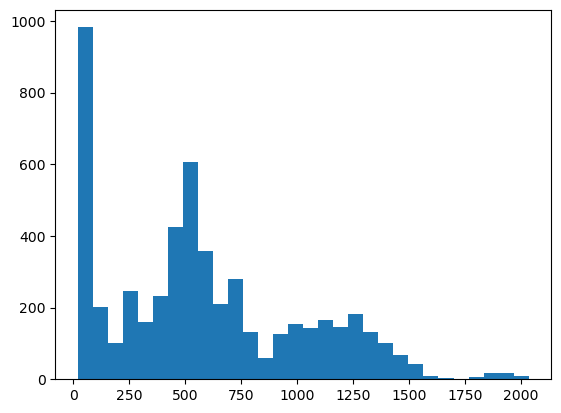

In [7]:
plt.hist(data['Open'],bins = 30)#bins sre used for number of division


In [8]:
x = data[['Open','Volume','High','Low','Last']]
y = data['Close']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [11]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(3979, 5) (3979,) (1327, 5) (1327,)


In [12]:
model_Reg = LinearRegression()
model_Reg.fit(x_train,y_train)

LinearRegression()

In [13]:
print(model_Reg.coef_)


[-5.76306239e-02 -2.11562912e-09  1.14033283e-01  1.09879671e-01
  8.33751288e-01]


In [14]:
print(model_Reg.intercept_) # negative means y is decreasing

-0.04522767001878947


In [15]:
predicted_value=model_Reg.predict(x_test)

In [16]:
predicted_value.shape

(1327,)

In [17]:
df = pd.DataFrame(y_test,predicted_value)

In [18]:
df1 = pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted_value})
print(df1)

      Actual Price  Predicted Price
1286        230.95       231.236436
4894        645.70       644.679837
2687       1562.25      1565.938811
4231        437.65       435.867423
1891        649.70       651.227929
...            ...              ...
882          74.95        74.835180
2633       1347.15      1346.811177
2128        628.60       628.150120
5305        714.90       713.307961
4295        499.25       498.545251

[1327 rows x 2 columns]


<Axes: >

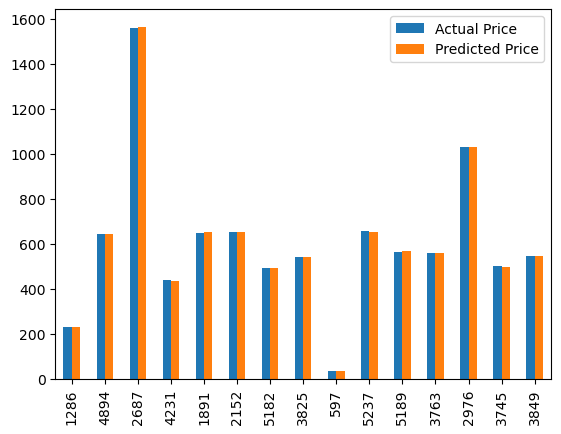

In [19]:
df2 = df1.head(15)
df2.plot(kind='bar')

In [20]:
import math
from sklearn import metrics

In [21]:
print(metrics.mean_absolute_error(y_test,predicted_value))

1.425740824703272


In [22]:
print(metrics.mean_squared_error(y_test,predicted_value))

5.562416522815954
